# Lending club case study

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Printing only the columns
loans = pd.read_csv('loan.csv')
print(list(loans))


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [3]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Step 1:

# Fixing Rows and columns

In [5]:
# To find the null items i.e 'NAn' elemnts in the data
loans.isnull().sum()
# there are 111 columns in the dataframe now

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# remove all the columns with full null values from the data set
loans.dropna(how='all',axis = 1 , inplace = True)
print(loans.shape)
print("the columns are reduced to 57 after removing the null values from the original data")

(39717, 57)
the columns are reduced to 57 after removing the null values from the original data


After removing the columns having full null values, we still have columns which contains the null values in the data which might affect our analysis during the study, hence we either have to remove or modify the null values from the remaining columns we have .

##### One way to find out the % of null values in the columns is given below:

In [7]:
round((loans.isnull().sum()/len(loans)*100).sort_values(ascending=False),2)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

Here, we can see the % of null values present in each column , removing all the columns which are having more than 60% of null values as they are not going to give us any insights with that limited amount of data remained in the column.

In [8]:
loans.shape

(39717, 57)

## columns after the removing the null values should be further more reduced for our analysis on loan defaulters:

1.As a part of cleaning, we should also remove the columns which doesn't contribute anything for our analysis, for example:The columns     'id', 'member_id' neither add any value nor we can infer any insight from it, hence removing such columns in the next line.

2.similarly , we can't infer any data from desc column , hence removing it.

3.funded_amnt, loan_amnt can be removed because we have funded_amnt_inv which contains the amount given by the bank to the applicant. 

4.Remaining columns are removed as they do not help us in getting any insights on our loan defaulting objective.

In [9]:
#Total columns view for our ease
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [10]:
#dropping all the unwanted columns and single valued columns from the dataset:
loans.drop(['revol_bal','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens','id','member_id','url','desc','funded_amnt','zip_code','delinq_2yrs','mths_since_last_delinq',
       'mths_since_last_record','emp_title','pymnt_plan','title'],inplace=True, axis=1)

In [11]:
loans.shape

(39717, 22)

### Remaining columns for our analysis to find the defaulters

In [12]:
loans.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [13]:
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [14]:
#Removing loan_status with current as it is not necessary
loans = loans[loans.loan_status!='Current']
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
loans.shape

(38577, 22)

Fixed the columns for our analysis till here.

### Step 2: 

# Missing values modification:

To find the missing values:

In [16]:
loans.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

There are two columns with missing values in the data, one is 'emp_length' and the other is 'revol_util', since the number of missing values are very less, we can either drop them or fill them with some aggregations which doesn't affect our amalysis...

In [17]:
#Filling the missing values in the emp_length column with mode:
loans.emp_length.fillna(loans.emp_length.mode()[0],inplace=True)#code for mode calc
loans.emp_length.isna().sum()# code for missing values identification

0

In [18]:
#dropping the missing values in the 'revol_util' column:
loans.dropna(subset=['revol_util'],inplace=True)
loans.revol_util.isna().sum()

0

In [19]:
#shape of the data after dropping the missing values.
loans.shape

(38527, 22)

In [20]:
loans.head(3)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10


Handled the missing values in the dataset till here.

### Step 3:

## Standardizing the values in the columns:

We have columns 'int_rate','emp_length','revol_util' to be standardized into either float or int.

In [21]:
#applying lambda funtion for removing the '%' symbol in int_rate column
loans.int_rate = pd.to_numeric(loans.int_rate.apply(lambda x : x[:-1]))

In [22]:
##applying lambda funtion for removing the '%' symbol in revol_util column
loans.revol_util = pd.to_numeric(loans.revol_util.apply(lambda x : x[:-1]))

Standardizing the emp_length column: The emp_lenth column contains of both numerics and characters, hence writing a function block to remove the character elements from the string. 
    

In [23]:
#funtion to remove the characters from the string leaving numbers:
def str2digit(x):
    if x == '< 1 year':
        return 0
    else:
        for s in x.split():
            if s.isdigit():
                return s
            if s == '10+':
                return s.split('+')[0]

In [24]:
#Assigning the emp_length data to the column in the loans dataset
loans.emp_length = pd.to_numeric(loans.emp_length.apply(str2digit))

In [25]:
loans.term = pd.to_numeric(loans.term.apply(str2digit))

In [26]:
loans.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [27]:
loans.home_ownership = loans.home_ownership.apply(lambda x: "OTHER" if x =="NONE" else x)
loans.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: home_ownership, dtype: int64

In [28]:
#creating a column as loan_status_num in which 0-fullypaid 1-chargedoff
loans['loan_status_num']=loans.loan_status.apply(lambda x:0 if x=="Fully Paid" else 1)

In [29]:
#creating a column as sub_grade_num in which it will have only numeric data
loans['sub_grade_num'] = loans.sub_grade.apply(lambda x: list(x)[-1])

In [30]:
loans['year']=loans.issue_d.apply(lambda x: datetime.strptime(x,'%b-%y').year)
loans['month']=loans.issue_d.apply(lambda x: x.split('-')[0])

## Sanitation checks

In [31]:
#checking whether installment is greater than loan amount
loans[loans['installment']>loans['loan_amnt']]!=False

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,loan_status_num,sub_grade_num,year,month


In [32]:
#checking whether installment is greater than funded amount
loans=loans[loans['installment']<loans['funded_amnt_inv']]

# Univariate-Analysis:
We'll be analysing variable one variable at a time as it is important to seperately understand each variable before moving on to analysing multiple variables together.
1. Ordered Variables ==> Grade,Subgrade,Month
2. Unordered variables ==>purpose,home_ownership
3. Quantitative variables ==> annual_inc,open_acc,total_acc

In [33]:
loans.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'loan_status_num',
       'sub_grade_num', 'year', 'month'],
      dtype='object')

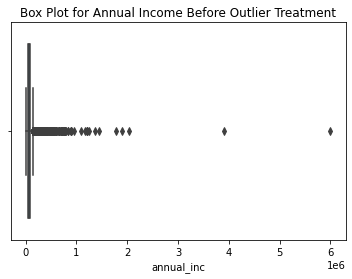

In [34]:
#Box Plot for Annual Income Before Outlier Treatment
ax = sns.boxplot(loans['annual_inc'])
ax.set_title("Box Plot for Annual Income Before Outlier Treatment")
plt.show()

 we can see clearly there are outliers in annual income when we see at box plot so we will find the IQR 
 to remove outliers

In [35]:
#IQR calculation
Q1 = loans.annual_inc.quantile(0.25)
Q3 = loans.annual_inc.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['annual_inc']<Upper_bound]

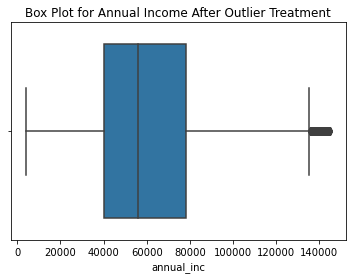

In [36]:
#Box Plot for Annual Income After Outlier Treatment
ax = sns.boxplot(loans['annual_inc'])
ax.set_title("Box Plot for Annual Income After Outlier Treatment")
plt.show()

##### Similarly check for other columns like intr_rate,funded_amnt_inv,loan_amnt

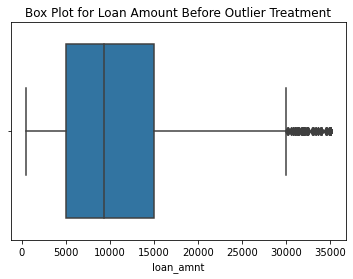

In [37]:
##Box Plot for Loan Amount Before Outlier Treatment
ax = sns.boxplot(loans['loan_amnt'])
ax.set_title("Box Plot for Loan Amount Before Outlier Treatment")
plt.show()

In [38]:
#IQR calculation
Q1 = loans.loan_amnt.quantile(0.25)
Q3 = loans.loan_amnt.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['loan_amnt']<Upper_bound]

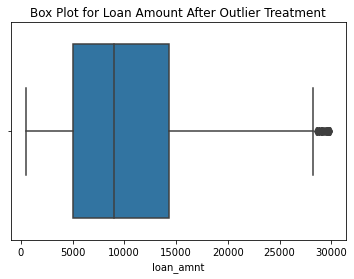

In [39]:
#Box Plot for Loan Amount After Outlier Treatment
ax = sns.boxplot(loans['loan_amnt'])
ax.set_title("Box Plot for Loan Amount After Outlier Treatment")
plt.show()

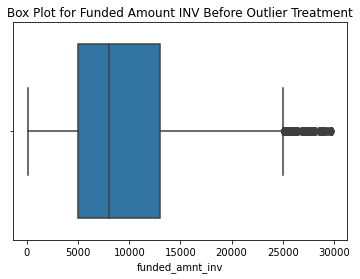

In [40]:
#Box Plot for Funded Amount INV Before Outlier Treatment
ax = sns.boxplot(loans['funded_amnt_inv'])
ax.set_title("Box Plot for Funded Amount INV Before Outlier Treatment")
plt.show()

In [41]:
#IQR calculation
Q1 = loans.funded_amnt_inv.quantile(0.25)
Q3 = loans.funded_amnt_inv.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['funded_amnt_inv']<Upper_bound]

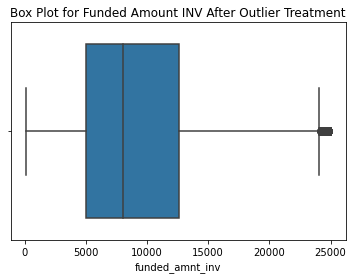

In [42]:
#Box Plot for Funded Amount INV After Outlier Treatment
ax = sns.boxplot(loans['funded_amnt_inv'])
ax.set_title("Box Plot for Funded Amount INV After Outlier Treatment")
plt.show()

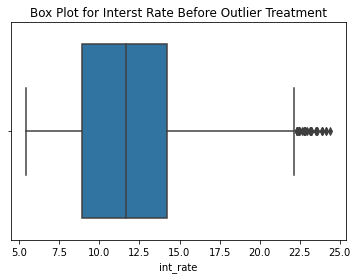

In [43]:
#Box Plot for Interst Rate Before Outlier Treatment
ax = sns.boxplot(loans['int_rate'])
ax.set_title("Box Plot for Interst Rate Before Outlier Treatment")
plt.show()

In [44]:
#IQR calculation
Q1 = loans.int_rate.quantile(0.25)
Q3 = loans.int_rate.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['int_rate']<Upper_bound]

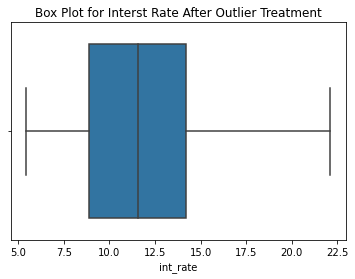

In [45]:
#Box Plot for Interst Rate After Outlier Treatment
ax = sns.boxplot(loans['int_rate'])
ax.set_title("Box Plot for Interst Rate After Outlier Treatment")
plt.show()

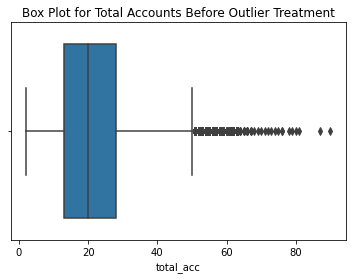

In [46]:
#Box Plot for Total Accounts Before Outlier Treatment
ax = sns.boxplot(loans['total_acc'])
ax.set_title("Box Plot for Total Accounts Before Outlier Treatment")
plt.show()

In [47]:
#IQR calculation
Q1 = loans.total_acc.quantile(0.25)
Q3 = loans.total_acc.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['total_acc']<Upper_bound]

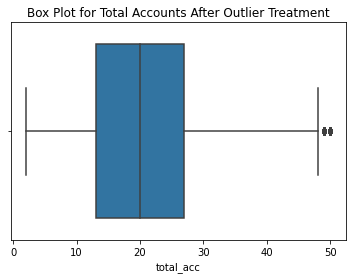

In [48]:
#Box Plot for Total Accounts After Outlier Treatment
ax = sns.boxplot(loans['total_acc'])
ax.set_title("Box Plot for Total Accounts After Outlier Treatment")
plt.show()

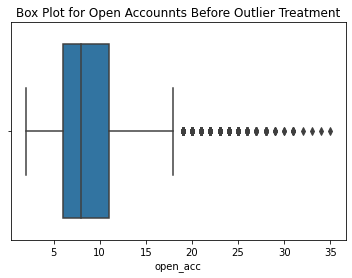

In [49]:
#Box Plot for Open Accounnts Before Outlier Treatment
ax = sns.boxplot(loans['open_acc'])
ax.set_title("Box Plot for Open Accounnts Before Outlier Treatment")
plt.show()

In [50]:
#IQR calculation
Q1 = loans.open_acc.quantile(0.25)
Q3 = loans.open_acc.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['open_acc']<Upper_bound]

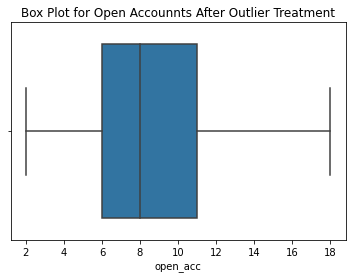

In [51]:
#Box Plot for Open Accounnts After Outlier Treatment
ax = sns.boxplot(loans['open_acc'])
ax.set_title("Box Plot for Open Accounnts After Outlier Treatment")
plt.show()

### Visualisation Plots: 
Usings Seaborn, Matplotlib libraries for plots:

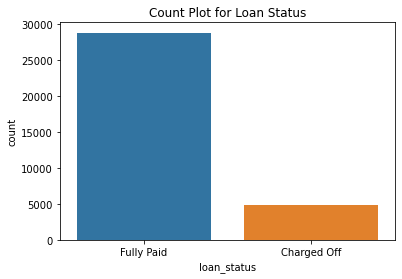

In [52]:
cp = sns.countplot(data = loans,x="loan_status")
cp.set_title("Count Plot for Loan Status")
plt.show()

Inference from Count Plot for Loan Status:
    This plot gives the insight of customers who cleared the loan taken from the bank and who defaulted the loan.

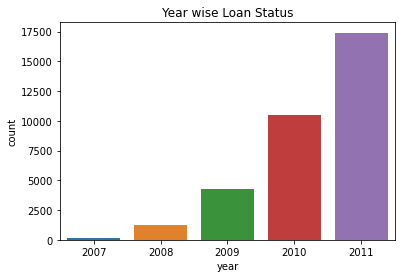

In [53]:
cp = sns.countplot(data = loans,x="year")
cp.set_title("Year wise Loan Status")
plt.show()

Inference:From the above plot , it is clear that there is a huge increase of customers taking the loans with respect to the Passing years.

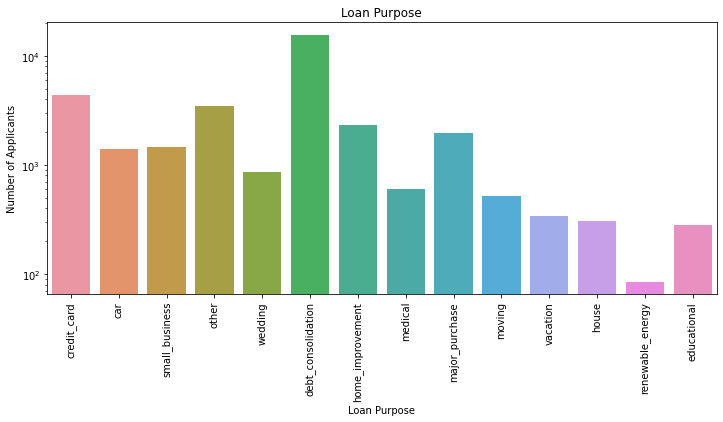

In [54]:
plt.figure(figsize=(12,5))
cp = sns.countplot(data = loans,x="purpose")
cp.set_title("Loan Purpose")
cp.set(ylabel="Number of Applicants",xlabel="Loan Purpose")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

###### Changed the plot to log scale for better visibility and distribution of the data.
Inferences:From the above plot, we can see the purpose of the loan taken by the customers.
            Here, we can see that most of the loans are taken for debt_consolidation i.e taking out a new loan to pay off other liabilities and consumer debts.

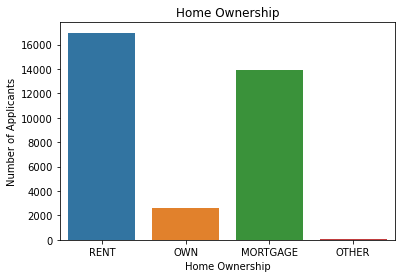

In [55]:
cp = sns.countplot(data = loans,x="home_ownership")
cp.set_title("Home Ownership")
cp.set(ylabel="Number of Applicants",xlabel="Home Ownership")
plt.show()

Inferences: The above plot gives the insight that the customers who live in rented houses took more loans followed by people having Mortgage,Own and other.
    

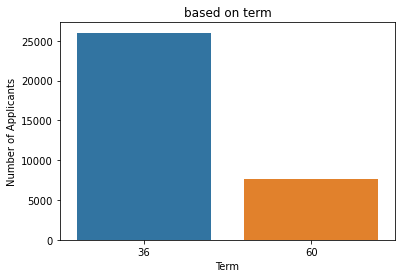

In [56]:
cp = sns.countplot(data = loans,x="term")
cp.set_title("based on term")
cp.set(ylabel="Number of Applicants",xlabel="Term")
plt.show()

Inferences: From the above plot , we can infer that most of the customers are preferring shorter terms for repaying the loans.

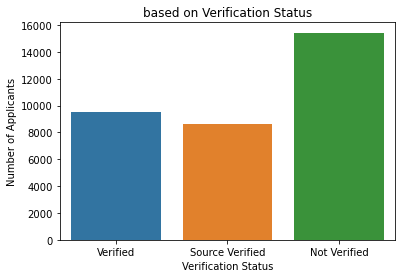

In [57]:
cp = sns.countplot(data = loans,x="verification_status")
cp.set_title("based on Verification Status")
cp.set(ylabel="Number of Applicants",xlabel="Verification Status")
plt.show()

Inferences:From the above plot , we can see that lot of customers are not verified with their income source status.

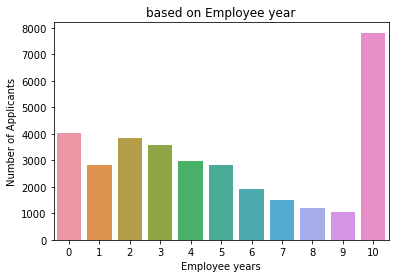

In [58]:
cp = sns.countplot(data = loans,x="emp_length")
cp.set_title("based on Employee year")
cp.set(ylabel="Number of Applicants",xlabel="Employee years")
plt.show()

Inferences:From the above plot, we can infer that more number of customers taking loans are having a work experience of 10 years.

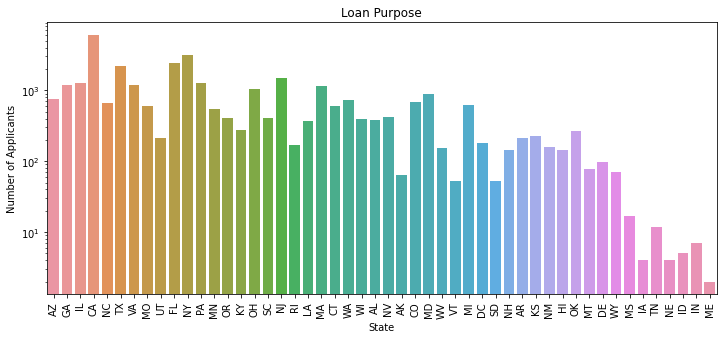

In [59]:
plt.figure(figsize=(12,5))
cp = sns.countplot(data = loans,x="addr_state")
cp.set_title("Loan Purpose")
cp.set(ylabel="Number of Applicants",xlabel="State")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Inferences: From the above plot, we can infer that most loan taking customers are from canada .

# Segmented Univariate Analysis
###### In segmented univariate analysis, we'll be extracting insights by conducting univariate analysis on segments of data.

In [60]:
#creating function for plotting, col_f = column filter,col_fco= column for charged off .
def plotdata(col_name,data=loans,figsize=(10,5),isLog=False,isRotation=False):
    total_def = len(data[data['loan_status_num']==1])
    sorted_col = sorted(data[col_name].unique())
    defaulter_ratios=[]
    for col in sorted_col:
        col_f = data[data[col_name] == col] #column filter
        col_fco = len(col_f[col_f['loan_status_num']==1]) #column charged off
        defaulter_ratios.append((col_fco/total_def)*100)
    plt.figure(figsize=figsize)
    plt.bar(sorted_col,defaulter_ratios)
    if isLog:
        plt.yscale('log')
    if isRotation:
        plt.xticks(rotation=90)
    plt.xlabel(col_name)
    plt.ylabel('Defaulters Percent')
    plt.show()

The above code is the function pertaining to all the segmented univariate analysis, we've taken different segments of data and plotted against the defaulters percent to get the insights on defaulters.

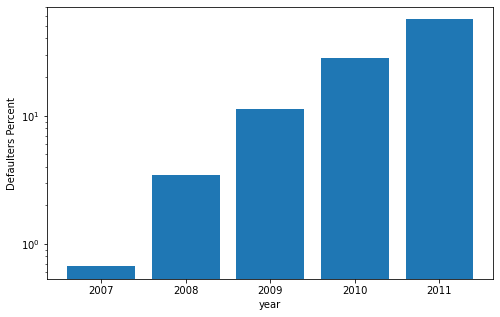

In [61]:
plotdata("year",figsize=(8,5),isLog=True)

Inferences: From the above plot, it is clearly evident that the percentage of defaulters is increasing with years, the most defaulters are in the year 2011

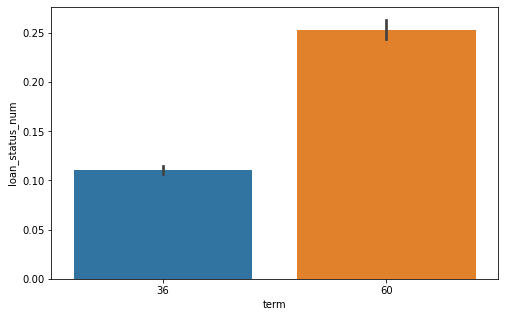

In [62]:
# defaulters per term
plt.figure(figsize=(8,5))
sns.barplot(x='term', y='loan_status_num', data=loans)
plt.show()

Inferences: From the above plot,we can infer that people who choose less term for clearing the loans are repaying the loans more efficiently than customers whose term is more.

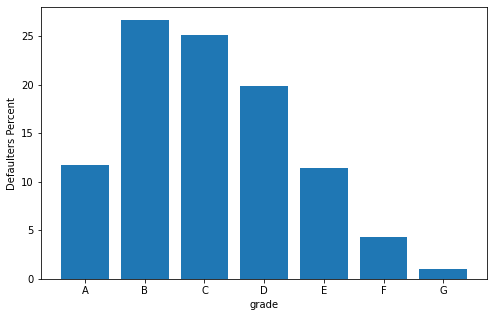

In [63]:
plotdata("grade",figsize=(8,5))

Inferences: From the above plot, we can see that there are more default customers with "B" grade followed by "C","D","A","E","F","G"

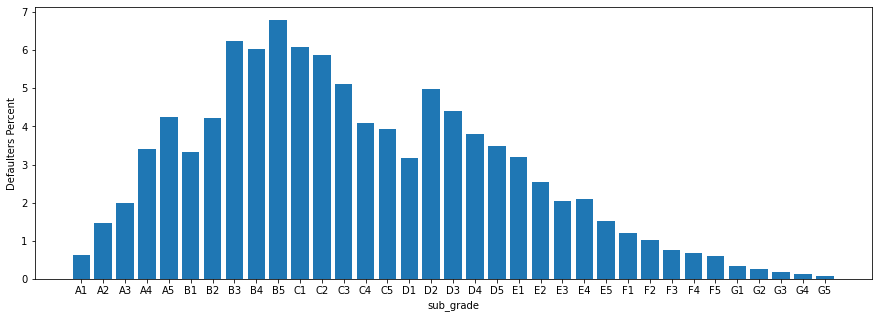

In [64]:
plotdata("sub_grade",figsize=(15,5))

Inferences: From the aboev plot we can see that there are more defaulters with sub_grades of 'B'

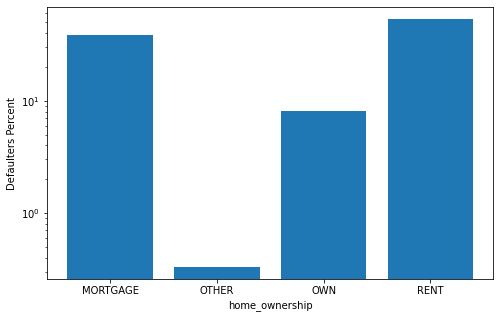

In [65]:
plotdata("home_ownership",figsize=(8,5),isLog=True)

Inferences:From the above data, we can infer that customers who live in rent houses, mortgage's are more likely to default than people living in their own houses and other. 

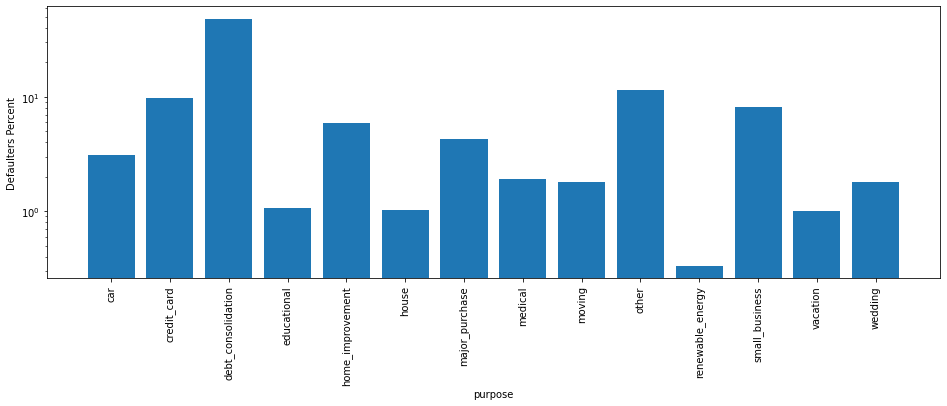

In [66]:
plotdata("purpose",figsize=(16,5),isLog=True,isRotation=True)

Inferences: From the above data, we can infer that customers who took loans for the purpose of debt_consolidation are more likely to default.

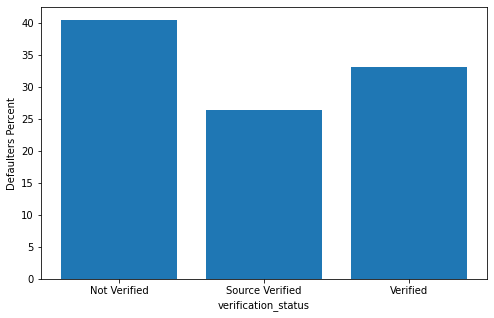

In [67]:
plotdata("verification_status",figsize=(8,5))

Inferences: From the above plot , we can infer that there are more defaulters whose verification status is not verified.

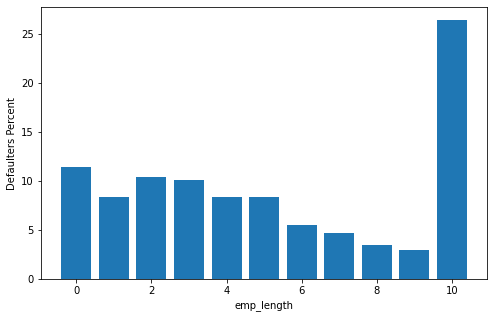

In [68]:
plotdata("emp_length",figsize=(8,5))

Inferences:From the above plot, we can infer that more number of customers are likely to default, whose work experience is of 10 years.

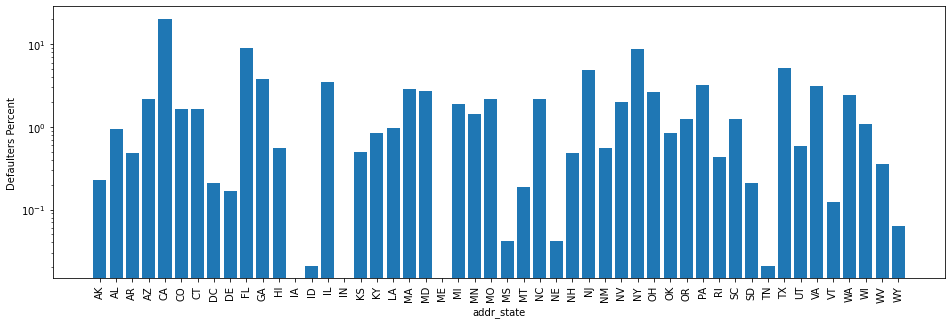

In [69]:
plotdata("addr_state",figsize=(16,5),isLog=True,isRotation=True)

Inferences: This plot shows the statistics of percentage of defaulters W.R.T the state they are residing, The most number of defaulters can be seen in Camada state.

# Bi-Variate Analysis and Multi-Variate Analysis

##### This is to understand the relationship between two variables, which is called bivariate analysis.

### 1.Continous Variables

##### we will plot Co-relation plots for continous variables


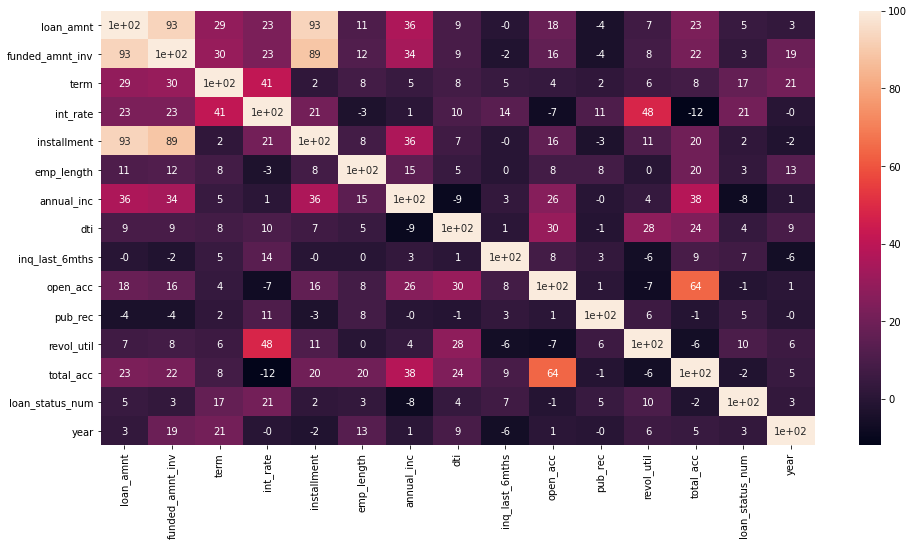

In [70]:
# co-relation between different variables in the dataset:
corr = round(loans.corr(),2)*100
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot = True)
plt.show()

### Inferences from the above plot:
### 1. Positive correlation 
    a.loan_amount and installment
    b.loan_amount and annual income
    c.interest rate and revol_util
### 2. Negative Correlation
    a.annual income and dti
    b.total_acc and interest rate
        

#### We are going to plot scatter plots to identify each relation.

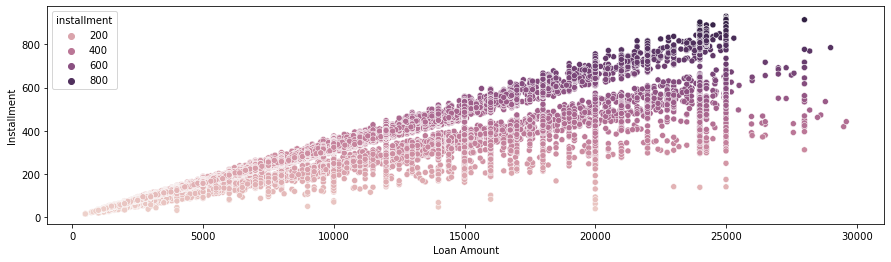

In [71]:
#loan_amount and installment
x=loans.loan_amnt
y = loans.installment
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()

Inferences:From this plot, we can see that when the loan amount increases , the installment amount also increases along with it which is a positive relation.

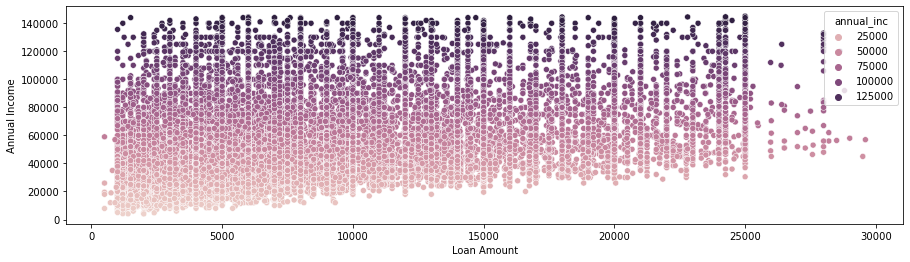

In [72]:
#loan_amount and annual income
x=loans.loan_amnt
y = loans.annual_inc
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)

plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()

Inferences: From this plot, we can infer that the customer's taking Loan amount is increasing if their annual income is high.

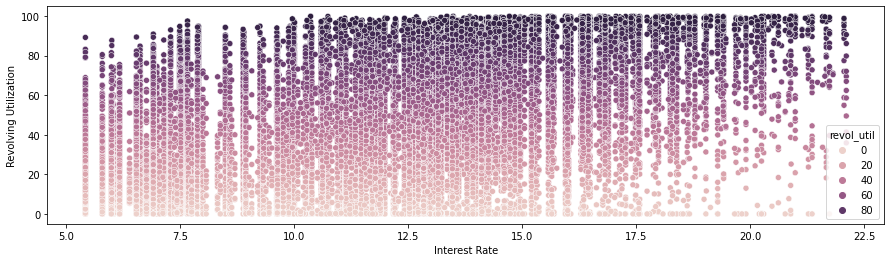

In [73]:
#loan_amount and revol_util
x=loans.int_rate
y = loans.revol_util
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Interest Rate')
plt.ylabel('Revolving Utilization')
plt.show()

Inferences: From above plot we cansee when interest rate increases then revolving utilizations increases

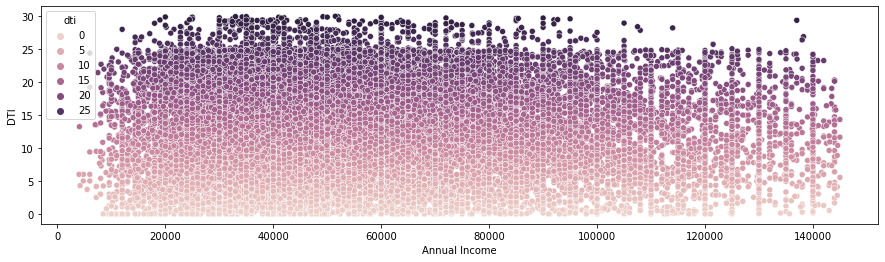

In [74]:
#annual_inc and dti
x=loans.annual_inc
y = loans.dti
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Annual Income')
plt.ylabel('DTI')
plt.show()

Inferences: From Above plot we can see if a person annual income increases then his debt ratio(dti) decreases resulting in negative relation

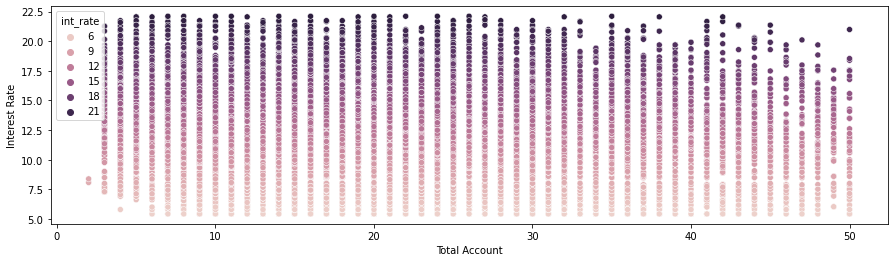

In [75]:
#interest_rate and Total credit lines
x=loans.total_acc
y = loans.int_rate
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Total Account')
plt.ylabel('Interest Rate')
plt.show()

Inferences: From the above plot, we can infer that the interest rate decreases then total credit lines increases

### 2. Categorical Variables

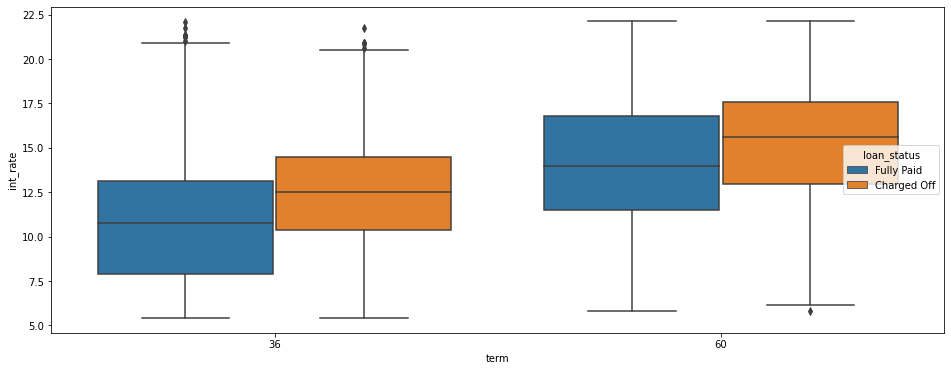

In [76]:
#term and int_rate wrt defaulters
plt.figure(figsize=(16,6))
sns.boxplot(x=loans.term,y=loans.int_rate,hue=loans.loan_status)
plt.show()

Inferences: From above plot we can see that defaulters are increasing when interest rate is increasing with respect to term

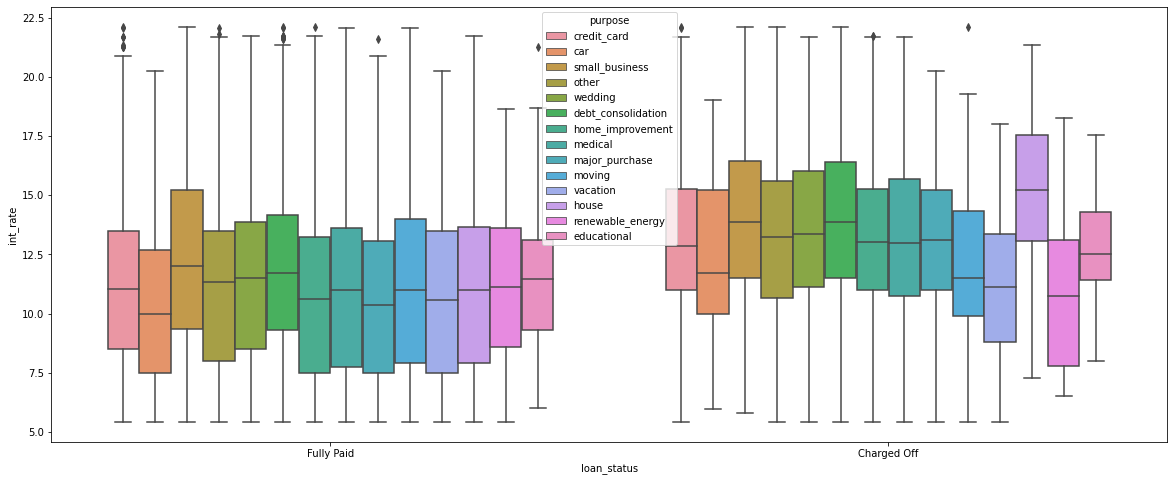

In [77]:
#purpose and int_rate wrt defaulters
plt.figure(figsize=(20,8))
sns.boxplot(x=loans.loan_status,y=loans.int_rate,hue=loans.purpose)
plt.show()

Inferences: From above plot we can see that defaulters are increasing when interest rate is increasing irrespective of purpose

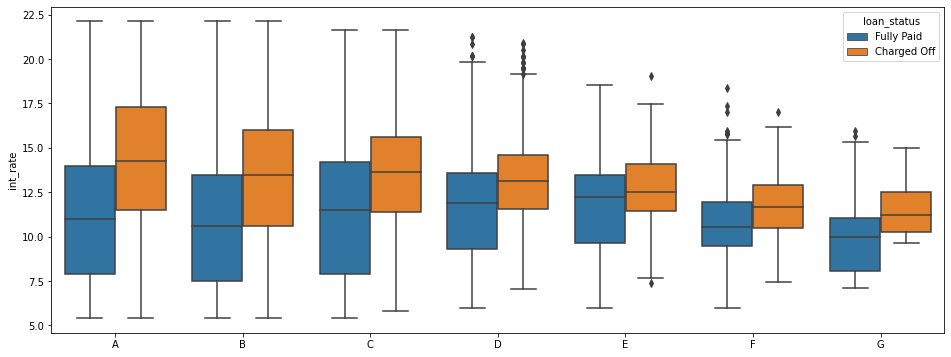

In [78]:
#intr_rate and grade wrt defaulters
plt.figure(figsize=(16,6))
grades = sorted(loans.grade)
sns.boxplot(x=grades,y=loans.int_rate,hue=loans.loan_status)
plt.show()

Inferences: From above plot we can see that defaulters are increasing when interest rate is increasing irrespective of grade 

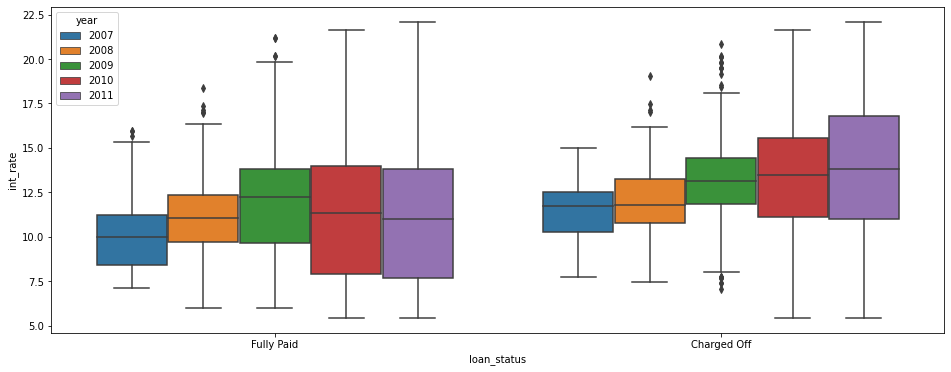

In [79]:
#int_rate and year wrt defaulters
plt.figure(figsize=(16,6))
sns.boxplot(x=loans.loan_status,y=loans.int_rate,hue=loans.year)
plt.show()

Inferences: From above plot we can see that defaulters are increasing when interest rate is increasing irrespective of year but year wise defaulters are increasing

## Conclusion

##### Columns or variables which are having chance to increase defaulters are:
#####  1. Term:
#####       We can see from analysis charged-off rate increases when term increases.
#####  2. Annual Income:
#####       We can see a negative relation between annual income and charged-off rate.i.e., lesser annual income more defaulters
#####  3. Interest Rate:
#####       We can see when interest rate increases the defaulters also increases.
#####  4. Employeement Length
#####       We can see when employee length increases then the defaulters also increases
#####  5. Verification Status
#####       We can observe that defaulters are more when not verified
#####  6. Home Ownership
#####       Defaulters are increased incase when ownership is rented

### Recommendations

##### 1. Reduce the loans for employees who have lesser annual income
##### 2. Consider employees who are greater than 1 year and less than 10+ years to avoid more charged offs
##### 3. Reduce interest rate below 20% to reduce defaulters
##### 4. Approve loans only to verified employees